In [1]:
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ACloudGuru-Resources/Course_AWS_Certified_Machine_Learning/master/Chapter6/ufo_fullset.csv')

In [3]:
dfx = df.loc[:, ['latitude', 'longitude']]

In [4]:
model = KMeans(n_clusters=10)

In [5]:
model.fit(dfx)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
df_centers = pd.DataFrame(model.cluster_centers_)

In [7]:
df_centers.columns = dfx.columns

In [8]:
df_centers.to_csv("Cluster_Centers.csv")
df.to_csv("ufo_fullset.csv")

In [10]:
from sagemaker import get_execution_role

role = get_execution_role()
print(role)

arn:aws:iam::889898167350:role/service-role/AmazonSageMakerServiceCatalogProductsUseRole


In [15]:
import boto3

s3 = boto3.resource('s3')
s3.meta.client.upload_file("ufo_fullset.csv", 'azarnyxtraining', "lab6/ufo_fullset.csv")

In [16]:
s3.meta.client.upload_file("ufo_fullset.csv", 'azarnyxtraining', "lab6/CLuster_Ceneters.csv")

In [20]:
conda install basemap

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::pandas==1.0.1=py36h0573a6f_0
  - defaults/noarch::flask==1.1.1=py_0
  - defaults/noarch::jupyterlab==1.2.6=pyhf63ae98_0
  - defaults/linux-64::scikit-learn==0.22.1=py36hd81dba3_0
  - defaults/linux-64::python-language-server==0.31.7=py36_0
  - defaults/linux-64::bkcharts==0.2=py36_0
  - defaults/linux-64::nb_conda==2.2.1=py36_0
  - defaults/noarch::numpydoc==0.9.2=py_0
  - defaults/linux-64::pytest-arraydiff==0.3=py36h39e3cac_0
  - defaults/linux-64::pyopenssl==19.1.0=py36_0
  - defaults/linux-64::bottleneck==1.3.2=py36heb32a55_0
  - defaults/linux-64::pywavelets==1.1.1=py36h7b6447c_0
  - defaults/noarch::pytest-astropy==0.8.0=py_0
  - defaults/linux-64::numexpr==2.7.1=py36h423224d_0
  - defaults/noarch::anaconda-project==0.8.4=py_0
  - defaults/linux-64::nbconvert==5.6.1=py36_0
  - defaults/linux-64::h5py==2.10.0

In [51]:
import os
os.environ['PROJ_LIB'] = '/home/ec2-user/anaconda3/envs/python3/share/basemap/'

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [73]:
from tqdm import tqdm

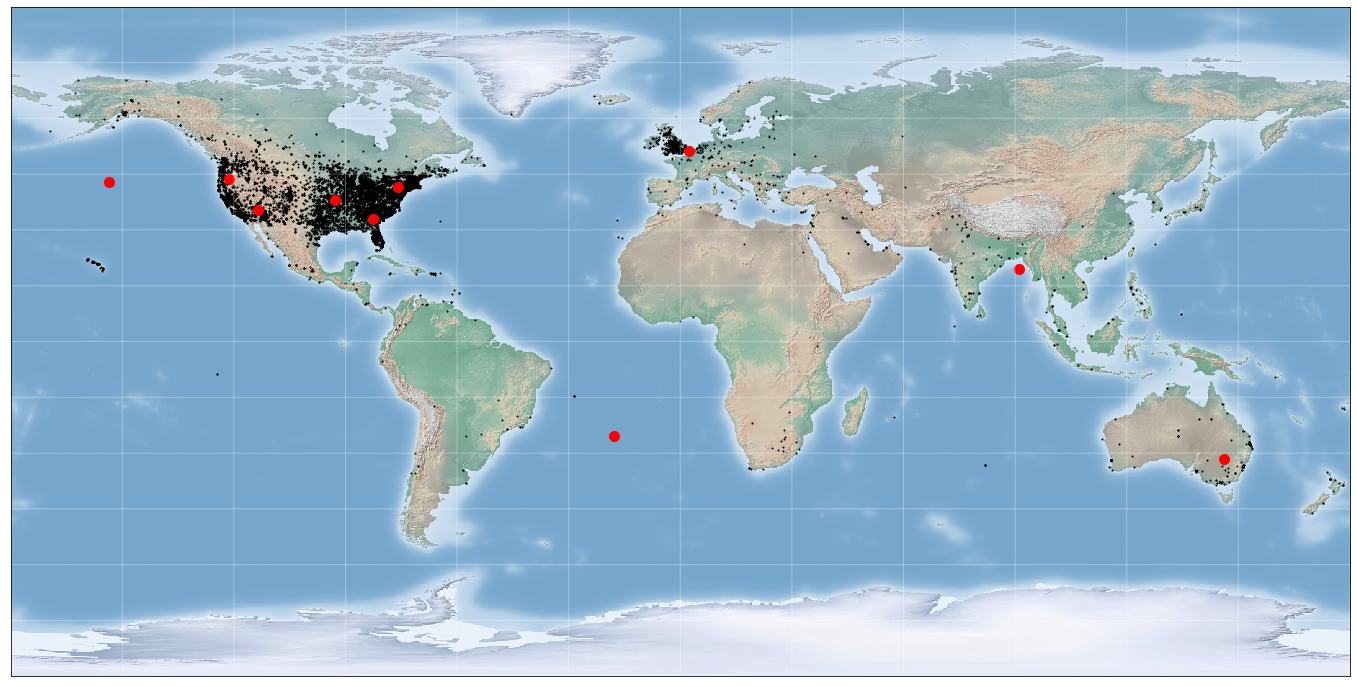

In [77]:
fig = plt.figure(figsize=(24, 18), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )

from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')
        
x,y = m(dfx.longitude, dfx.latitude)
plt.plot(x,y, 'ok', markersize=1)
#for i in tqdm(range(len(x))): 
#    #x, y = m(-122.3, 47.6) # long, lat
#    plt.plot(x.iloc[i], y.iloc[i], 'ok', markersize=5)
#    
for i,dfi in df_centers.iterrows():
    x, y = m(dfi.longitude, dfi.latitude)
    plt.plot(x, y, 'ok', markersize=10, color='red')
draw_map(m)